In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_valid is {X_valid.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_valid is {y_valid.shape}")


Shape of X_train is (13600, 8)
Shape of X_valid is (3400, 8)
Shape of y_train is (13600,)
Shape of y_valid is (3400,)


In [26]:
input_shape = [X.shape[1]]
model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape = input_shape),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=1)
])

In [27]:
model.compile(optimizer='adam', loss='mae')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)
history = model.fit(x=X_train, 
                    y=y_train, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping],
                    epochs=100,
                    batch_size=256
                    )

Epoch 1/100
54/54 [==============================] - 1s 8ms/step - loss: 200405.5469 - val_loss: 188906.0781
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 152212.4531 - val_loss: 121681.4844
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 117557.1797 - val_loss: 118319.9531
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 116112.9297 - val_loss: 117005.7188
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 114610.3047 - val_loss: 115290.9141
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 112652.5156 - val_loss: 113060.8281
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 110311.9844 - val_loss: 110427.9844
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 107262.4297 - val_loss: 107033.0703
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 103645.0859 - val_loss: 103073.1953
Epoch 10/100
54/54 

54/54 [==============================] - 0s 3ms/step - loss: 64722.0000 - val_loss: 65127.9023
Epoch 77/100
54/54 [==============================] - 0s 3ms/step - loss: 64860.0547 - val_loss: 64957.0156
Epoch 78/100
54/54 [==============================] - 0s 3ms/step - loss: 64463.6758 - val_loss: 64681.1289
Epoch 79/100
54/54 [==============================] - 0s 3ms/step - loss: 64179.1562 - val_loss: 64538.6250
Epoch 80/100
54/54 [==============================] - 0s 3ms/step - loss: 64138.3281 - val_loss: 65272.4531
Epoch 81/100
54/54 [==============================] - 0s 3ms/step - loss: 64047.4883 - val_loss: 64693.8438
Epoch 82/100
54/54 [==============================] - 0s 3ms/step - loss: 63891.0156 - val_loss: 64015.0039
Epoch 83/100
54/54 [==============================] - 0s 3ms/step - loss: 63832.5547 - val_loss: 63797.2695
Epoch 84/100
54/54 [==============================] - 0s 3ms/step - loss: 63625.5078 - val_loss: 63930.1445
Epoch 85/100
54/54 [=====================

<AxesSubplot:>

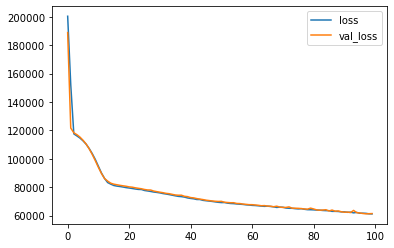

In [29]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [19]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 24) dtype=float32, numpy=
 array([[-2.20282102e+00,  2.76188612e-01, -1.62698701e-01,
          1.54809684e-01,  4.97305930e-01, -1.12638068e+00,
         -9.14166749e-01,  2.14359015e-01, -2.09609246e+00,
         -6.51523992e-02,  8.59772384e-01,  1.10779512e+00,
          9.99000669e-01, -5.65632284e-02, -3.83270919e-01,
         -9.86081421e-01, -2.13963914e+00, -6.93125904e-01,
         -1.74859222e-02,  4.01003331e-01,  2.85014838e-01,
          1.10614967e+00,  4.30896878e-01, -3.01948905e-01],
        [-1.84111583e+00, -3.78175402e+00, -3.02976871e+00,
         -2.90093493e+00, -4.05281067e+00, -2.39062476e+00,
         -2.71755052e+00, -2.42547587e-01, -1.99321413e+00,
         -3.02617121e+00, -3.45476890e+00, -1.12866318e+00,
         -3.04183626e+00, -2.31603399e-01, -3.04430819e+00,
         -2.76965761e+00, -2.16864681e+00, -2.26071906e+00,
         -3.12804627e+00, -1.48113459e-01,  5.15757799e-02,
         -2.35533619e+00, -3.690